# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Import and Preparing Data

In [2]:
df = pd.read_csv('my_movies.csv')
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [4]:
df.fillna(0, inplace=True)

In [5]:
df.head(20)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,0,0,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,0,0,0,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,0,0,0,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,0,0,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,0,1,1,0,0,0,0,0,1,0,1


In [6]:
df.dtypes

V1               object
V2               object
V3               object
V4               object
V5               object
Sixth Sense       int64
Gladiator         int64
LOTR1             int64
Harry Potter1     int64
Patriot           int64
LOTR2             int64
Harry Potter2     int64
LOTR              int64
Braveheart        int64
Green Mile        int64
dtype: object

In [7]:
df1 = df.iloc[:, 5:].astype(bool)
df1.dtypes

Sixth Sense      bool
Gladiator        bool
LOTR1            bool
Harry Potter1    bool
Patriot          bool
LOTR2            bool
Harry Potter2    bool
LOTR             bool
Braveheart       bool
Green Mile       bool
dtype: object

In [8]:
count = df1.sum()
count

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

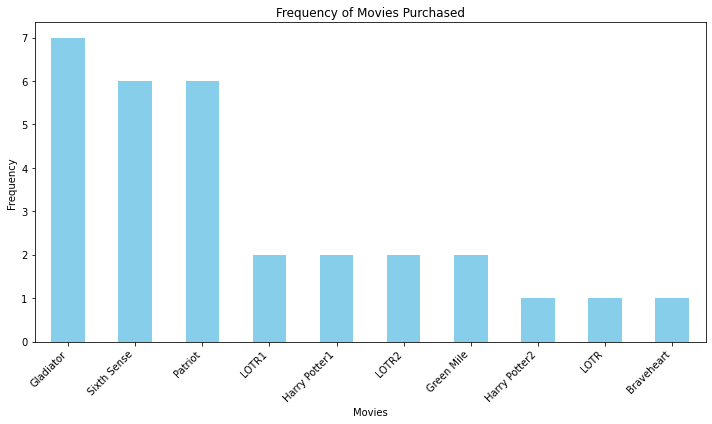

In [9]:
plt.figure(figsize=(10, 6))
count.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Frequency of Movies Purchased')
plt.xlabel('Movies')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
support_values = df1.sum() / df1.shape[0]

support_df = pd.DataFrame(support_values, columns=["Support"]).sort_values("Support", ascending=False)
support_df

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


# Apply Apriori algorithm with different support and confidence values

In [11]:
supports = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6] 
confidences = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  

for support in supports:
    for confidence in confidences:
       
        frequent_itemsets = apriori(df1, min_support=support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        print(f"Support: {support}, Confidence: {confidence}, Number of Rules: {len(rules)}")

Support: 0.1, Confidence: 0.3, Number of Rules: 217
Support: 0.1, Confidence: 0.4, Number of Rules: 216
Support: 0.1, Confidence: 0.5, Number of Rules: 216
Support: 0.1, Confidence: 0.6, Number of Rules: 134
Support: 0.1, Confidence: 0.7, Number of Rules: 129
Support: 0.1, Confidence: 0.8, Number of Rules: 128
Support: 0.1, Confidence: 0.9, Number of Rules: 125
Support: 0.2, Confidence: 0.3, Number of Rules: 16
Support: 0.2, Confidence: 0.4, Number of Rules: 15
Support: 0.2, Confidence: 0.5, Number of Rules: 15
Support: 0.2, Confidence: 0.6, Number of Rules: 14
Support: 0.2, Confidence: 0.7, Number of Rules: 9
Support: 0.2, Confidence: 0.8, Number of Rules: 8
Support: 0.2, Confidence: 0.9, Number of Rules: 5
Support: 0.3, Confidence: 0.3, Number of Rules: 12
Support: 0.3, Confidence: 0.4, Number of Rules: 12
Support: 0.3, Confidence: 0.5, Number of Rules: 12
Support: 0.3, Confidence: 0.6, Number of Rules: 11
Support: 0.3, Confidence: 0.7, Number of Rules: 6
Support: 0.3, Confidence: 0.

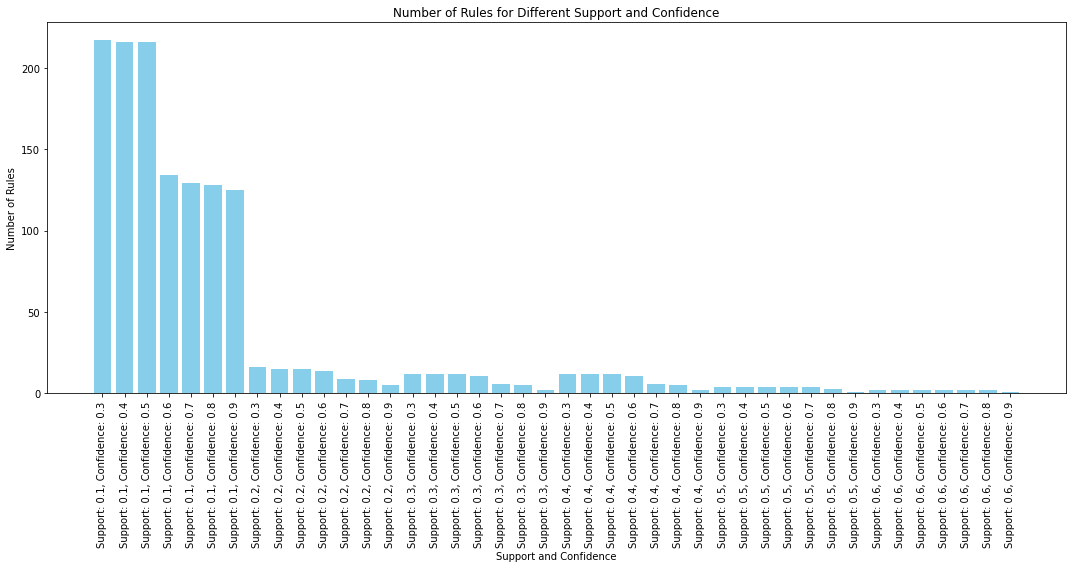

In [12]:
support = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
confidence = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
num_rules = [217, 216, 216, 134, 129, 128, 125, 16, 15, 15, 14, 9, 8, 5, 12, 12, 12, 11, 6, 5, 2, 12, 12, 12, 11, 6, 5, 2, 4, 4, 4, 4, 4, 3, 1, 2, 2, 2, 2, 2, 2, 1]

plt.figure(figsize=(15, 8))
plt.bar(range(len(num_rules)), num_rules, color='skyblue')
plt.xlabel('Support and Confidence')
plt.ylabel('Number of Rules')
plt.title('Number of Rules for Different Support and Confidence')
plt.xticks(range(len(num_rules)), [f'Support: {sup}, Confidence: {conf}' for sup, conf in zip(support, confidence)], rotation=90)
plt.tight_layout()
plt.show()

## Association Rules with 10% Support

In [13]:
Frequent_itemsets1 = apriori(df1, min_support=0.1, use_colnames=True)
rules1=association_rules(Frequent_itemsets1, metric='lift', min_threshold=1)

In [14]:
rules10=rules1[['antecedents','consequents', 'support', 'confidence', 'lift' ]]
rules10.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
119,"(LOTR2, Green Mile)",(Harry Potter1),0.1,1.0,5.000000
167,"(LOTR1, Sixth Sense, Green Mile)",(LOTR2),0.1,1.0,5.000000
92,(Braveheart),"(Patriot, Gladiator)",0.1,1.0,1.666667
155,"(Sixth Sense, Harry Potter1, Green Mile)",(LOTR1),0.1,1.0,5.000000
90,"(Braveheart, Gladiator)",(Patriot),0.1,1.0,1.666667
156,"(LOTR1, Sixth Sense)","(Harry Potter1, Green Mile)",0.1,1.0,10.000000
88,"(Patriot, Braveheart)",(Gladiator),0.1,1.0,1.428571
157,"(LOTR1, Harry Potter1)","(Sixth Sense, Green Mile)",0.1,1.0,5.000000
86,(LOTR),"(Sixth Sense, Green Mile)",0.1,1.0,5.000000
158,"(LOTR1, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,1.0,10.000000


### - 30% Confidence

In [15]:
rules13 = rules10[rules1['confidence'] > 0.3]
rules13.sort_values(by='confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
124,"(Sixth Sense, LOTR, Gladiator)",(Green Mile),0.1,1.0,5.0
97,(LOTR),"(Gladiator, Green Mile)",0.1,1.0,10.0
169,"(Sixth Sense, LOTR2, Green Mile)",(LOTR1),0.1,1.0,5.0
170,"(LOTR1, Sixth Sense)","(LOTR2, Green Mile)",0.1,1.0,10.0
172,"(LOTR1, Green Mile)","(Sixth Sense, LOTR2)",0.1,1.0,10.0
108,"(Harry Potter1, Green Mile)",(LOTR1),0.1,1.0,5.0
107,"(LOTR1, Green Mile)",(Harry Potter1),0.1,1.0,5.0
106,"(LOTR1, Harry Potter1)",(Green Mile),0.1,1.0,5.0
173,"(Sixth Sense, LOTR2)","(LOTR1, Green Mile)",0.1,1.0,10.0
175,"(LOTR2, Green Mile)","(LOTR1, Sixth Sense)",0.1,1.0,10.0


### - 40% Confidence

In [16]:
rules14 = rules10[rules1['confidence'] > 0.4]
rules14.sort_values(by='confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
125,"(Sixth Sense, LOTR, Green Mile)",(Gladiator),0.1,1.0,1.428571
183,"(Sixth Sense, Harry Potter1, Green Mile)",(LOTR2),0.1,1.0,5.000000
169,"(Sixth Sense, LOTR2, Green Mile)",(LOTR1),0.1,1.0,5.000000
170,"(LOTR1, Sixth Sense)","(LOTR2, Green Mile)",0.1,1.0,10.000000
172,"(LOTR1, Green Mile)","(Sixth Sense, LOTR2)",0.1,1.0,10.000000
173,"(Sixth Sense, LOTR2)","(LOTR1, Green Mile)",0.1,1.0,10.000000
108,"(Harry Potter1, Green Mile)",(LOTR1),0.1,1.0,5.000000
107,"(LOTR1, Green Mile)",(Harry Potter1),0.1,1.0,5.000000
106,"(LOTR1, Harry Potter1)",(Green Mile),0.1,1.0,5.000000
175,"(LOTR2, Green Mile)","(LOTR1, Sixth Sense)",0.1,1.0,10.000000


### - 50% Confidence

In [17]:
rules15 = rules10[rules1['confidence'] > 0.5]
rules15.sort_values(by='confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
134,(LOTR),"(Sixth Sense, Gladiator, Green Mile)",0.1,1.0,10.000000
161,"(Harry Potter1, Green Mile)","(LOTR1, Sixth Sense)",0.1,1.0,10.000000
185,"(LOTR2, Harry Potter1)","(Sixth Sense, Green Mile)",0.1,1.0,5.000000
184,"(Sixth Sense, LOTR2)","(Harry Potter1, Green Mile)",0.1,1.0,10.000000
183,"(Sixth Sense, Harry Potter1, Green Mile)",(LOTR2),0.1,1.0,5.000000
182,"(LOTR2, Harry Potter1, Green Mile)",(Sixth Sense),0.1,1.0,1.666667
181,"(Sixth Sense, LOTR2, Green Mile)",(Harry Potter1),0.1,1.0,5.000000
180,"(Sixth Sense, LOTR2, Harry Potter1)",(Green Mile),0.1,1.0,5.000000
175,"(LOTR2, Green Mile)","(LOTR1, Sixth Sense)",0.1,1.0,10.000000
173,"(Sixth Sense, LOTR2)","(LOTR1, Green Mile)",0.1,1.0,10.000000


### - 60% Confidence

In [18]:
rules16=rules10[rules1['confidence']>0.6]
rules16.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
138,"(LOTR1, Sixth Sense, Harry Potter1)",(LOTR2),0.1,1.0,5.000000
166,"(LOTR1, Sixth Sense, LOTR2)",(Green Mile),0.1,1.0,5.000000
186,"(LOTR2, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,1.0,10.000000
185,"(LOTR2, Harry Potter1)","(Sixth Sense, Green Mile)",0.1,1.0,5.000000
184,"(Sixth Sense, LOTR2)","(Harry Potter1, Green Mile)",0.1,1.0,10.000000
183,"(Sixth Sense, Harry Potter1, Green Mile)",(LOTR2),0.1,1.0,5.000000
182,"(LOTR2, Harry Potter1, Green Mile)",(Sixth Sense),0.1,1.0,1.666667
181,"(Sixth Sense, LOTR2, Green Mile)",(Harry Potter1),0.1,1.0,5.000000
180,"(Sixth Sense, LOTR2, Harry Potter1)",(Green Mile),0.1,1.0,5.000000
175,"(LOTR2, Green Mile)","(LOTR1, Sixth Sense)",0.1,1.0,10.000000


### - 70% Confidence

In [19]:
rules17=rules10[rules1['confidence']>0.7]
rules17.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
140,"(LOTR1, LOTR2, Harry Potter1)",(Sixth Sense),0.1,1.0,1.666667
141,"(Sixth Sense, Harry Potter1, LOTR2)",(LOTR1),0.1,1.0,5.000000
187,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,1.0,10.000000
186,"(LOTR2, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,1.0,10.000000
185,"(LOTR2, Harry Potter1)","(Sixth Sense, Green Mile)",0.1,1.0,5.000000
184,"(Sixth Sense, LOTR2)","(Harry Potter1, Green Mile)",0.1,1.0,10.000000
183,"(Sixth Sense, Harry Potter1, Green Mile)",(LOTR2),0.1,1.0,5.000000
182,"(LOTR2, Harry Potter1, Green Mile)",(Sixth Sense),0.1,1.0,1.666667
181,"(Sixth Sense, LOTR2, Green Mile)",(Harry Potter1),0.1,1.0,5.000000
180,"(Sixth Sense, LOTR2, Harry Potter1)",(Green Mile),0.1,1.0,5.000000


### - 80% Confidence

In [20]:
rules18=rules10[rules1['confidence']>0.8]
rules18.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
141,"(Sixth Sense, Harry Potter1, LOTR2)",(LOTR1),0.1,1.0,5.000000
168,"(LOTR1, LOTR2, Green Mile)",(Sixth Sense),0.1,1.0,1.666667
187,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,1.0,10.000000
186,"(LOTR2, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,1.0,10.000000
185,"(LOTR2, Harry Potter1)","(Sixth Sense, Green Mile)",0.1,1.0,5.000000
184,"(Sixth Sense, LOTR2)","(Harry Potter1, Green Mile)",0.1,1.0,10.000000
183,"(Sixth Sense, Harry Potter1, Green Mile)",(LOTR2),0.1,1.0,5.000000
182,"(LOTR2, Harry Potter1, Green Mile)",(Sixth Sense),0.1,1.0,1.666667
181,"(Sixth Sense, LOTR2, Green Mile)",(Harry Potter1),0.1,1.0,5.000000
180,"(Sixth Sense, LOTR2, Harry Potter1)",(Green Mile),0.1,1.0,5.000000


### - 90% Confidence

In [21]:
rules19=rules10[rules1['confidence']>0.9]
rules19.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
5,(LOTR),(Sixth Sense),0.1,1.0,1.666667
169,"(Sixth Sense, LOTR2, Green Mile)",(LOTR1),0.1,1.0,5.000000
189,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR2)",0.1,1.0,10.000000
187,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,1.0,10.000000
186,"(LOTR2, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,1.0,10.000000
185,"(LOTR2, Harry Potter1)","(Sixth Sense, Green Mile)",0.1,1.0,5.000000
184,"(Sixth Sense, LOTR2)","(Harry Potter1, Green Mile)",0.1,1.0,10.000000
183,"(Sixth Sense, Harry Potter1, Green Mile)",(LOTR2),0.1,1.0,5.000000
182,"(LOTR2, Harry Potter1, Green Mile)",(Sixth Sense),0.1,1.0,1.666667
181,"(Sixth Sense, LOTR2, Green Mile)",(Harry Potter1),0.1,1.0,5.000000


## Association Rules with 20% Support

In [22]:
Frequent_itemsets2 = apriori(df1, min_support=0.2, use_colnames=True)
rules2=association_rules(Frequent_itemsets2, metric='lift', min_threshold=1)

In [23]:
rules2=rules2[['antecedents','consequents', 'support', 'confidence', 'lift' ]]
rules2.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
5,(Green Mile),(Sixth Sense),0.2,1.000000,1.666667
6,(Patriot),(Gladiator),0.6,1.000000,1.428571
8,(LOTR1),(LOTR2),0.2,1.000000,5.000000
9,(LOTR2),(LOTR1),0.2,1.000000,5.000000
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
7,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
12,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Patriot),(Sixth Sense),0.4,0.666667,1.111111


### - 30% Confidence

In [24]:
rules23=rules2[rules2['confidence']>0.3]
rules23.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
5,(Green Mile),(Sixth Sense),0.2,1.000000,1.666667
6,(Patriot),(Gladiator),0.6,1.000000,1.428571
8,(LOTR1),(LOTR2),0.2,1.000000,5.000000
9,(LOTR2),(LOTR1),0.2,1.000000,5.000000
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
7,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
12,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Patriot),(Sixth Sense),0.4,0.666667,1.111111


### - 40% Confidence

In [25]:
rules24=rules2[rules2['confidence']>0.4]
rules24.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
5,(Green Mile),(Sixth Sense),0.2,1.000000,1.666667
6,(Patriot),(Gladiator),0.6,1.000000,1.428571
8,(LOTR1),(LOTR2),0.2,1.000000,5.000000
9,(LOTR2),(LOTR1),0.2,1.000000,5.000000
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
7,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
12,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Patriot),(Sixth Sense),0.4,0.666667,1.111111


### - 50% Confidence

In [26]:
rules25=rules2[rules2['confidence']>0.5]
rules25.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
5,(Green Mile),(Sixth Sense),0.2,1.000000,1.666667
6,(Patriot),(Gladiator),0.6,1.000000,1.428571
8,(LOTR1),(LOTR2),0.2,1.000000,5.000000
9,(LOTR2),(LOTR1),0.2,1.000000,5.000000
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
7,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
12,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Patriot),(Sixth Sense),0.4,0.666667,1.111111


### - 60% Confidence

In [27]:
rules26=rules2[rules2['confidence']>0.6]
rules26.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
5,(Green Mile),(Sixth Sense),0.2,1.000000,1.666667
6,(Patriot),(Gladiator),0.6,1.000000,1.428571
8,(LOTR1),(LOTR2),0.2,1.000000,5.000000
9,(LOTR2),(LOTR1),0.2,1.000000,5.000000
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
7,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
12,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Patriot),(Sixth Sense),0.4,0.666667,1.111111


### - 70% Confidence

In [28]:
rules27=rules2[rules2['confidence']>0.7]
rules27.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
5,(Green Mile),(Sixth Sense),0.2,1.000000,1.666667
6,(Patriot),(Gladiator),0.6,1.000000,1.428571
8,(LOTR1),(LOTR2),0.2,1.000000,5.000000
9,(LOTR2),(LOTR1),0.2,1.000000,5.000000
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
7,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
12,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476


### - 80% Confidence

In [29]:
rules28=rules2[rules2['confidence']>0.8]
rules28.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
5,(Green Mile),(Sixth Sense),0.2,1.000000,1.666667
6,(Patriot),(Gladiator),0.6,1.000000,1.428571
8,(LOTR1),(LOTR2),0.2,1.000000,5.000000
9,(LOTR2),(LOTR1),0.2,1.000000,5.000000
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
7,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476


### - 90% Confidence

In [30]:
rules29=rules2[rules2['confidence']>0.9]
rules29.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
5,(Green Mile),(Sixth Sense),0.2,1.0,1.666667
6,(Patriot),(Gladiator),0.6,1.0,1.428571
8,(LOTR1),(LOTR2),0.2,1.0,5.000000
9,(LOTR2),(LOTR1),0.2,1.0,5.000000
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.0,1.428571


## Association Rules with 30% Support

In [31]:
Frequent_itemsets3 = apriori(df1, min_support=0.3, use_colnames=True)
rules3=association_rules(Frequent_itemsets3, metric='lift', min_threshold=1)

In [32]:
rules3=rules3[['antecedents','consequents', 'support', 'confidence', 'lift' ]]
rules3.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
4,(Patriot),(Gladiator),0.6,1.000000,1.428571
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
5,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
8,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Patriot),(Sixth Sense),0.4,0.666667,1.111111
3,(Sixth Sense),(Patriot),0.4,0.666667,1.111111
7,"(Patriot, Gladiator)",(Sixth Sense),0.4,0.666667,1.111111
9,(Patriot),"(Sixth Sense, Gladiator)",0.4,0.666667,1.333333


### - 30% Confidence

In [33]:
rules33=rules3[rules3['confidence']>0.3]
rules33.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
4,(Patriot),(Gladiator),0.6,1.000000,1.428571
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
5,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
8,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Patriot),(Sixth Sense),0.4,0.666667,1.111111
3,(Sixth Sense),(Patriot),0.4,0.666667,1.111111
7,"(Patriot, Gladiator)",(Sixth Sense),0.4,0.666667,1.111111
9,(Patriot),"(Sixth Sense, Gladiator)",0.4,0.666667,1.333333


### - 40% Confidence

In [34]:
rules43=rules3[rules3['confidence']>0.4]
rules43.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
4,(Patriot),(Gladiator),0.6,1.000000,1.428571
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
5,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
8,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Patriot),(Sixth Sense),0.4,0.666667,1.111111
3,(Sixth Sense),(Patriot),0.4,0.666667,1.111111
7,"(Patriot, Gladiator)",(Sixth Sense),0.4,0.666667,1.111111
9,(Patriot),"(Sixth Sense, Gladiator)",0.4,0.666667,1.333333


### - 50% Confidence

In [35]:
rules53=rules3[rules3['confidence']>0.5]
rules53.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
4,(Patriot),(Gladiator),0.6,1.000000,1.428571
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
5,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
8,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Patriot),(Sixth Sense),0.4,0.666667,1.111111
3,(Sixth Sense),(Patriot),0.4,0.666667,1.111111
7,"(Patriot, Gladiator)",(Sixth Sense),0.4,0.666667,1.111111
9,(Patriot),"(Sixth Sense, Gladiator)",0.4,0.666667,1.333333


### - 60% Confidence

In [36]:
rules63=rules3[rules3['confidence']>0.6]
rules63.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
4,(Patriot),(Gladiator),0.6,1.000000,1.428571
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
5,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
8,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Patriot),(Sixth Sense),0.4,0.666667,1.111111
3,(Sixth Sense),(Patriot),0.4,0.666667,1.111111
7,"(Patriot, Gladiator)",(Sixth Sense),0.4,0.666667,1.111111
9,(Patriot),"(Sixth Sense, Gladiator)",0.4,0.666667,1.333333


### - 70% Confidence

In [37]:
rules73=rules3[rules3['confidence']>0.7]
rules73.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
4,(Patriot),(Gladiator),0.6,1.000000,1.428571
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
5,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
8,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476


### - 80% Confidence

In [38]:
rules83=rules3[rules3['confidence']>0.8]
rules83.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
4,(Patriot),(Gladiator),0.6,1.000000,1.428571
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
5,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476


### - 90% Confidence

In [39]:
rules93=rules3[rules3['confidence']>0.9]
rules93.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
4,(Patriot),(Gladiator),0.6,1.0,1.428571
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.0,1.428571


## Association Rules with 40% Support

In [40]:
Frequent_itemsets4 = apriori(df1, min_support=0.4, use_colnames=True)
rules4=association_rules(Frequent_itemsets4, metric='lift', min_threshold=1)

In [41]:
rules4=rules4[['antecedents','consequents', 'support', 'confidence', 'lift' ]]
rules4.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
4,(Patriot),(Gladiator),0.6,1.000000,1.428571
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
5,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
8,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Patriot),(Sixth Sense),0.4,0.666667,1.111111
3,(Sixth Sense),(Patriot),0.4,0.666667,1.111111
7,"(Patriot, Gladiator)",(Sixth Sense),0.4,0.666667,1.111111
9,(Patriot),"(Sixth Sense, Gladiator)",0.4,0.666667,1.333333


### - 30% Confidence

In [42]:
rules43=rules4[rules4['confidence']>0.3]
rules43.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
4,(Patriot),(Gladiator),0.6,1.000000,1.428571
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
5,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
8,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Patriot),(Sixth Sense),0.4,0.666667,1.111111
3,(Sixth Sense),(Patriot),0.4,0.666667,1.111111
7,"(Patriot, Gladiator)",(Sixth Sense),0.4,0.666667,1.111111
9,(Patriot),"(Sixth Sense, Gladiator)",0.4,0.666667,1.333333


### - 40% Confidence

In [43]:
rules44=rules4[rules4['confidence']>0.4]
rules44.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
4,(Patriot),(Gladiator),0.6,1.000000,1.428571
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
5,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
8,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Patriot),(Sixth Sense),0.4,0.666667,1.111111
3,(Sixth Sense),(Patriot),0.4,0.666667,1.111111
7,"(Patriot, Gladiator)",(Sixth Sense),0.4,0.666667,1.111111
9,(Patriot),"(Sixth Sense, Gladiator)",0.4,0.666667,1.333333


### - 50% Confidence

In [44]:
rules45=rules4[rules4['confidence']>0.5]
rules45.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
4,(Patriot),(Gladiator),0.6,1.000000,1.428571
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
5,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
8,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Patriot),(Sixth Sense),0.4,0.666667,1.111111
3,(Sixth Sense),(Patriot),0.4,0.666667,1.111111
7,"(Patriot, Gladiator)",(Sixth Sense),0.4,0.666667,1.111111
9,(Patriot),"(Sixth Sense, Gladiator)",0.4,0.666667,1.333333


### - 60% Confidence

In [45]:
rules46=rules4[rules4['confidence']>0.6]
rules46.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
4,(Patriot),(Gladiator),0.6,1.000000,1.428571
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
5,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
8,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
2,(Patriot),(Sixth Sense),0.4,0.666667,1.111111
3,(Sixth Sense),(Patriot),0.4,0.666667,1.111111
7,"(Patriot, Gladiator)",(Sixth Sense),0.4,0.666667,1.111111
9,(Patriot),"(Sixth Sense, Gladiator)",0.4,0.666667,1.333333


### - 70% Confidence

In [46]:
rules47=rules4[rules4['confidence']>0.7]
rules47.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
4,(Patriot),(Gladiator),0.6,1.000000,1.428571
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
5,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
8,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476


### - 80% Confidence

In [47]:
rules48=rules4[rules4['confidence']>=0.8]
rules48.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
4,(Patriot),(Gladiator),0.6,1.000000,1.428571
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.000000,1.428571
5,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
8,"(Sixth Sense, Gladiator)",(Patriot),0.4,0.800000,1.333333


### - 90% Confidence

In [48]:
rules49=rules4[rules4['confidence']>=0.9]
rules49.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
4,(Patriot),(Gladiator),0.6,1.0,1.428571
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,1.0,1.428571


## Association Rules with 50% Support

In [49]:
Frequent_itemsets5 = apriori(df1, min_support=0.5, use_colnames=True)
rules5=association_rules(Frequent_itemsets5, metric='lift', min_threshold=1)

In [50]:
rules5=rules5[['antecedents','consequents', 'support', 'confidence', 'lift' ]]
rules5.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
2,(Patriot),(Gladiator),0.6,1.000000,1.428571
3,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476


### - 30% Confidence

In [51]:
rules53=rules5[rules5['confidence']>0.3]
rules53.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
2,(Patriot),(Gladiator),0.6,1.000000,1.428571
3,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476


### - 40% Confidence

In [52]:
rules54=rules5[rules5['confidence']>0.4]
rules54.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
2,(Patriot),(Gladiator),0.6,1.000000,1.428571
3,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476


### - 50% Confidence

In [53]:
rules55=rules5[rules5['confidence']>0.5]
rules55.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
2,(Patriot),(Gladiator),0.6,1.000000,1.428571
3,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476


### - 60% Confidence

In [54]:
rules56=rules5[rules5['confidence']>0.6]
rules56.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
2,(Patriot),(Gladiator),0.6,1.000000,1.428571
3,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476


### - 70% Confidence

In [55]:
rules57=rules5[rules5['confidence']>0.7]
rules57.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
2,(Patriot),(Gladiator),0.6,1.000000,1.428571
3,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476


### - 80% Confidence

In [56]:
rules58=rules5[rules5['confidence']>0.8]
rules58.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
2,(Patriot),(Gladiator),0.6,1.000000,1.428571
3,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476


### - 90% Confidence

In [57]:
rules59=rules5[rules5['confidence']>0.9]
rules59.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
2,(Patriot),(Gladiator),0.6,1.0,1.428571


## Association Rules with 60% Support

In [58]:
Frequent_itemsets6 = apriori(df1, min_support=0.6, use_colnames=True)
rules6=association_rules(Frequent_itemsets6, metric='lift', min_threshold=1)

In [59]:
rules6=rules6[['antecedents','consequents', 'support', 'confidence', 'lift' ]]
rules6.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
0,(Patriot),(Gladiator),0.6,1.000000,1.428571
1,(Gladiator),(Patriot),0.6,0.857143,1.428571


### - 30% Confidence

In [60]:
rules63=rules6[rules6['confidence']>0.3]
rules63.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
0,(Patriot),(Gladiator),0.6,1.000000,1.428571
1,(Gladiator),(Patriot),0.6,0.857143,1.428571


### - 40% Confidence

In [61]:
rules64=rules6[rules6['confidence']>0.4]
rules64.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
0,(Patriot),(Gladiator),0.6,1.000000,1.428571
1,(Gladiator),(Patriot),0.6,0.857143,1.428571


### - 50% Confidence

In [62]:
rules65=rules6[rules6['confidence']>0.5]
rules65.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
0,(Patriot),(Gladiator),0.6,1.000000,1.428571
1,(Gladiator),(Patriot),0.6,0.857143,1.428571


### - 60% Confidence

In [63]:
rules66=rules6[rules6['confidence']>0.6]
rules66.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
0,(Patriot),(Gladiator),0.6,1.000000,1.428571
1,(Gladiator),(Patriot),0.6,0.857143,1.428571


### - 70% Confidence

In [64]:
rules67=rules6[rules6['confidence']>0.7]
rules67.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
0,(Patriot),(Gladiator),0.6,1.000000,1.428571
1,(Gladiator),(Patriot),0.6,0.857143,1.428571


### - 80% Confidence

In [65]:
rules68=rules6[rules6['confidence']>0.8]
rules68.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
0,(Patriot),(Gladiator),0.6,1.000000,1.428571
1,(Gladiator),(Patriot),0.6,0.857143,1.428571


### - 90% Confidence

In [66]:
rules69=rules6[rules6['confidence']>0.9]
rules69.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
0,(Patriot),(Gladiator),0.6,1.0,1.428571


## Support: 0.5, Confidence: 0.9

In [74]:
Frequent_itemsets_fnl = apriori(df1, min_support=0.5, use_colnames=True)
rules_fnl=association_rules(Frequent_itemsets_fnl, metric='lift', min_threshold=1)

In [73]:
rules_fnl=rules_fnl[['antecedents','consequents', 'support', 'confidence', 'lift' ]]
rules_fnl.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
2,(Patriot),(Gladiator),0.6,1.000000,1.428571
3,(Gladiator),(Patriot),0.6,0.857143,1.428571
0,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
1,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476


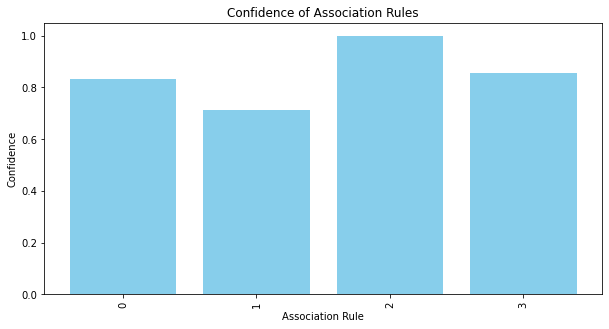

In [78]:
# Plot confidence
plt.figure(figsize=(10, 5))
plt.bar(range(len(rules_fnl)), rules_fnl['confidence'], color='skyblue')
plt.xlabel('Association Rule')
plt.ylabel('Confidence')
plt.title('Confidence of Association Rules')
plt.xticks(range(len(rules_fnl)), [f"{rule}" for rule in rules_fnl.index], rotation=90)
plt.show()

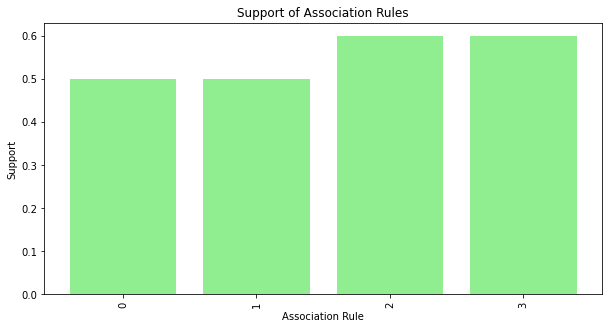

In [79]:
# Plot support
plt.figure(figsize=(10, 5))
plt.bar(range(len(rules_fnl)), rules_fnl['support'], color='lightgreen')
plt.xlabel('Association Rule')
plt.ylabel('Support')
plt.title('Support of Association Rules')
plt.xticks(range(len(rules_fnl)), [f"{rule}" for rule in rules_fnl.index], rotation=90)
plt.show()

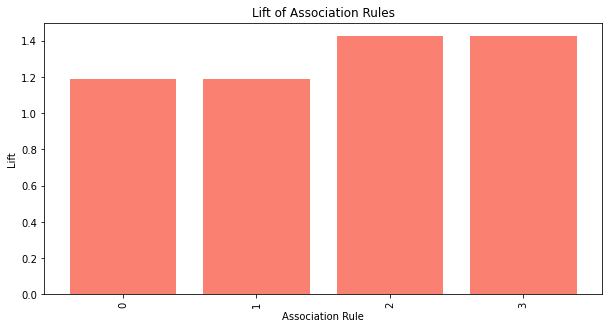

In [80]:
# Plot lift
plt.figure(figsize=(10, 5))
plt.bar(range(len(rules_fnl)), rules_fnl['lift'], color='salmon')
plt.xlabel('Association Rule')
plt.ylabel('Lift')
plt.title('Lift of Association Rules')
plt.xticks(range(len(rules_fnl)), [f"{rule}" for rule in rules_fnl.index], rotation=90)
plt.show()

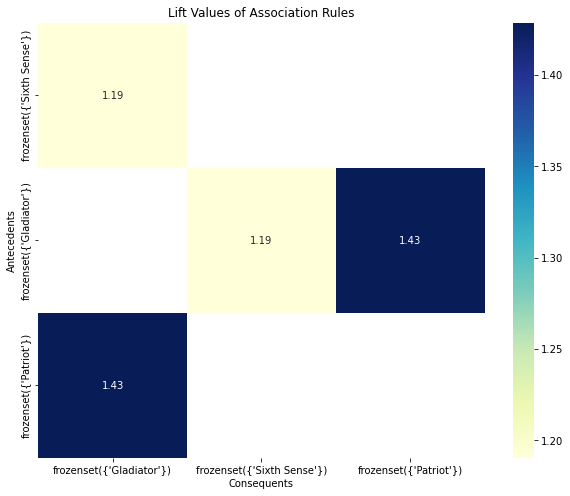

In [85]:
pivot_table_lift = pd.pivot_table(rules_fnl, values='lift', index='antecedents', columns='consequents')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table_lift, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Lift Values of Association Rules')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

## Support: 0.6, Confidence: 0.9, Number of Rules: 1

In [88]:
Frequent_itemsets_fnl1 = apriori(df1, min_support=0.6, use_colnames=True)
rules_fnl1=association_rules(Frequent_itemsets_fnl1, metric='lift', min_threshold=1)

In [89]:
rules_fnl1=rules_fnl1[['antecedents','consequents', 'support', 'confidence', 'lift' ]]
rules_fnl1.sort_values('confidence', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
0,(Patriot),(Gladiator),0.6,1.000000,1.428571
1,(Gladiator),(Patriot),0.6,0.857143,1.428571


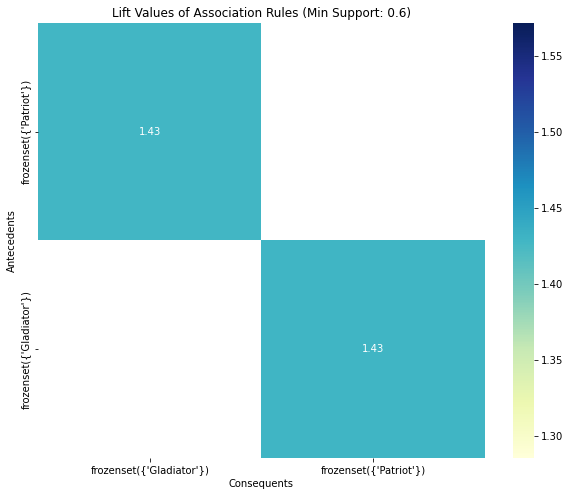

In [90]:
pivot_table_lift = pd.pivot_table(rules_fnl1, values='lift', index='antecedents', columns='consequents')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table_lift, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Lift Values of Association Rules (Min Support: 0.6)')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

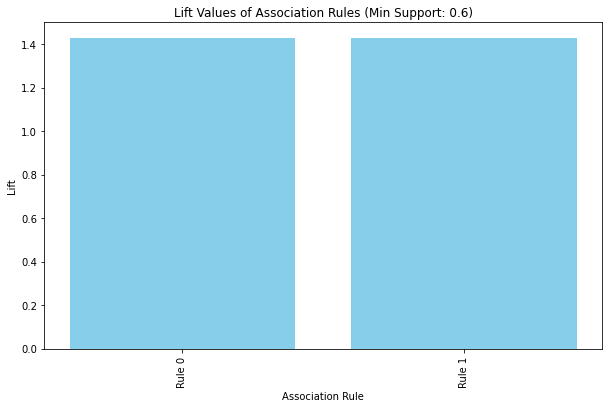

In [91]:
lift_values = rules_fnl1['lift']
association_rules_indices = range(len(rules_fnl1))

plt.figure(figsize=(10, 6))
plt.bar(association_rules_indices, lift_values, color='skyblue')
plt.xlabel('Association Rule')
plt.ylabel('Lift')
plt.title('Lift Values of Association Rules (Min Support: 0.6)')
plt.xticks(association_rules_indices, [f"Rule {i}" for i in association_rules_indices], rotation=90)
plt.show()

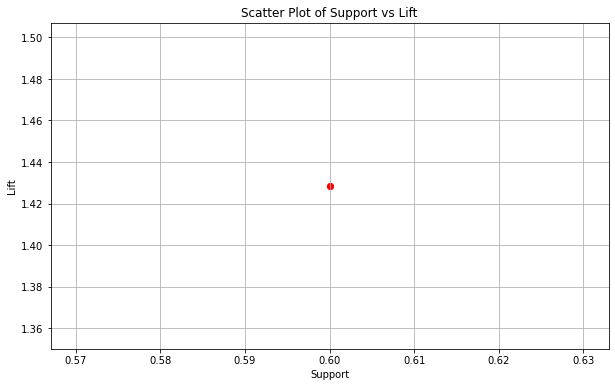

In [94]:
support_values = rules_fnl1['support']
lift_values = rules_fnl1['lift']

plt.figure(figsize=(10, 6))
plt.scatter(support_values, lift_values, color='Red', alpha=1)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Scatter Plot of Support vs Lift')
plt.grid(True)
plt.show()

- The analysis showed that "Patriot" and "Gladiator" are often bought together, with a high chance of one being purchased if the other is bought. This connection is supported by a significant lift value of 1.428571, indicating a strong association between the two movies in sales patterns.

## --END--